In [56]:
import keras
import os
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
%matplotlib inline

In [57]:
train = pd.read_csv(r'C:\Users\tinac\te\skin\skin_upd.csv')    # reading the csv file
train.head()   

,imglink,acmebreakouts,darkskintone,dryskin,earings,EastAsian,fairskintone,heartface,leftsideface,mediumskin,...,ovalface,resistiveskin,rightsideface,sensitiveskin,SouthEastAsian,tatoos,visiblepores,withglasses,withgoggles,Western
0,acme 1,1,0,1,1,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,1
1,acme 2,1,0,0,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,1
2,acme 3,1,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,1
3,acme 4,1,0,0,0,0,1,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,acme 5,1,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [58]:
train.columns

Index(['imglink', 'acmebreakouts', 'darkskintone', 'dryskin', 'earings',
       'EastAsian', 'fairskintone', 'heartface', 'leftsideface', 'mediumskin',
       'necklace', 'oily', 'ovalface', 'resistiveskin', 'rightsideface',
       'sensitiveskin', 'SouthEastAsian', 'tatoos', 'visiblepores',
       'withglasses', 'withgoggles', 'Western'],
      dtype='object')

In [59]:
train_image = []
for i in tqdm(range(1,601)):
    img = image.load_img(r'C:/Users/tinac/te/skin/IMG/'+str(i)+'.jpg',target_size=(400,400,3))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)

100%|████████████████████████████████████████████████████████████████████████████████| 600/600 [00:06<00:00, 86.42it/s]


In [60]:
train_image1=(train_image[:600])
X1 = np.array(train_image1)

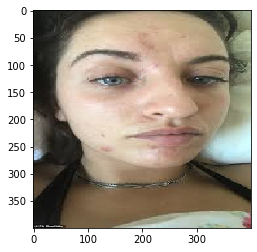

In [61]:
plt.imshow(X1[39])

In [62]:
y = np.array(train.drop(['imglink'],axis=1))
y1=y[0:600]
y1.shape

(600, 21)

In [63]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state=2, test_size=0.1)

In [64]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(400,400,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(21, activation='sigmoid'))

In [65]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 396, 396, 16)      1216      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 198, 198, 16)      0         
_________________________________________________________________
dropout_25 (Dropout)         (None, 198, 198, 16)      0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 194, 194, 32)      12832     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 97, 97, 32)        0         
_________________________________________________________________
dropout_26 (Dropout)         (None, 97, 97, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 93, 93, 64)       

In [66]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [80]:
model.fit(X1_train, y1_train, epochs=30, validation_data=(X1_test, y1_test), batch_size=15)

Train on 540 samples, validate on 60 samples
Epoch 1/30
540/540 [==============================] - 77s 143ms/step - loss: 0.5000 - accuracy: 0.7682 - val_loss: 0.4976 - val_accuracy: 0.7603
Epoch 2/30
540/540 [==============================] - 77s 142ms/step - loss: 0.4992 - accuracy: 0.7681 - val_loss: 0.4977 - val_accuracy: 0.7603
Epoch 3/30
540/540 [==============================] - 77s 143ms/step - loss: 0.4984 - accuracy: 0.7675 - val_loss: 0.4943 - val_accuracy: 0.7603
Epoch 4/30
540/540 [==============================] - 80s 148ms/step - loss: 0.5005 - accuracy: 0.7651 - val_loss: 0.4960 - val_accuracy: 0.7603
Epoch 5/30
540/540 [==============================] - 80s 147ms/step - loss: 0.4976 - accuracy: 0.7697 - val_loss: 0.4992 - val_accuracy: 0.7603
Epoch 6/30
540/540 [==============================] - 80s 148ms/step - loss: 0.4986 - accuracy: 0.7676 - val_loss: 0.4954 - val_accuracy: 0.7603
Epoch 7/30
540/540 [==============================] - 81s 150ms/step - loss: 0.4952 -

In [89]:
img = image.load_img(r'C:\Users\tinac\te\skin\IMG\823.jpg',target_size=(400,400,3))
img = image.img_to_array(img)
img = img/255

['darkskintone' 'dryskin' 'earings' 'EastAsian' 'fairskintone' 'heartface'
 'leftsideface' 'mediumskin' 'necklace' 'oily' 'ovalface' 'resistiveskin'
 'rightsideface' 'sensitiveskin' 'SouthEastAsian' 'tatoos' 'visiblepores'
 'withglasses' 'withgoggles' 'Western']
[[0.04969173 0.02280309 0.13637573 0.3313892  0.08675317 0.8920146
  0.28951666 0.13481992 0.14890105 0.08713253 0.15779492 0.5573286
  0.7658417  0.17419185 0.19939059 0.32738268 0.00271471 0.10257013
  0.02870294 0.2307888  0.4581619 ]]
[ 4 11 10 19]
fairskintone (0.0868)
resistiveskin (0.557)
ovalface (0.158)
Western (0.231)


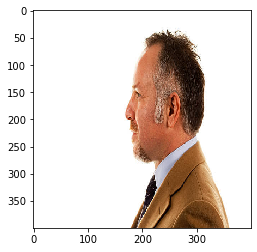

In [90]:
classes = np.array(train.columns[2:])
print(classes)
proba = model.predict(img.reshape(1,400,400,3))
print(proba)
top_3 = np.argsort(proba[0])[:-5:-1]
top_3[0]=top_3[0]-1
top_3[1]=top_3[1]-1
top_3[2]=top_3[2]-1
top_3[3]=top_3[3]-1
print(top_3)
for i in range(4):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)